# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1400)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1400)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    #print(city)
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

588

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
city1 = []
cloudy = []
country = []
date = []
humid = []
lat = []
lng = []
max_temp = []
wind = []
index = 0


print("Data Pull ")
print("************************")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# append city information into lists
for index, city in enumerate(cities):
    try:
        response = requests.get(query_url + city).json()
        city1.append(response["name"])
        cloudy.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humid.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wind.append(response["wind"]["speed"])
        index+=1 
        print(f"City search #{index} : {city}") 
        
    except(KeyError, IndexError):
        print("City not found.")
        
#print("************************")
#print(" Complete")



Data Pull 
************************
City search #1 : dikson
City search #2 : khandyga
City search #3 : escanaba
City search #4 : ahipara
City search #5 : viedma
City search #6 : coos bay
City search #7 : zwedru
City search #8 : makakilo city
City search #9 : kruisfontein
City search #10 : yellowknife
City search #11 : salalah
City search #12 : mackay
City search #13 : chiang khong
City search #14 : graaff-reinet
City search #15 : jamestown
City not found.
City search #17 : ushuaia
City search #18 : mataura
City search #19 : shuangyang
City search #20 : tautira
City search #21 : kita
City search #22 : nouadhibou
City search #23 : upernavik
City search #24 : mar del plata
City search #25 : tasiilaq
City search #26 : rikitea
City search #27 : edd
City search #28 : hermanus
City search #29 : bengkulu
City not found.
City search #31 : hilo
City search #32 : barrow
City search #33 : albany
City search #34 : punta arenas
City not found.
City search #36 : severo-kurilsk
City search #37 : geral

City search #302 : vermilion
City search #303 : severomuysk
City search #304 : codrington
City search #305 : ahuimanu
City search #306 : magaria
City not found.
City search #308 : horsham
City search #309 : luderitz
City search #310 : san rafael
City search #311 : sinnamary
City search #312 : karatau
City search #313 : cidreira
City search #314 : naze
City search #315 : omboue
City search #316 : panji
City search #317 : le port
City search #318 : ust-nera
City search #319 : mount gambier
City search #320 : dillon
City search #321 : kisangani
City search #322 : lima
City search #323 : urengoy
City search #324 : hudson bay
City search #325 : amga
City search #326 : oktyabrskiy
City search #327 : aswan
City search #328 : padang
City search #329 : loyga
City search #330 : antalaha
City search #331 : mende
City search #332 : sao filipe
City search #333 : praia da vitoria
City search #334 : ossora
City search #335 : roma
City search #336 : lages
City search #337 : gambela
City search #338 : 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a panda data frame using data retrieved
weather = pd.DataFrame({ 
                "City" : city1,
                "Cloudiness" : cloudy,
                "Country" : country,
                "Date" : date,
                "Humidity" : humid,
                "Lat" : lat,
                "Lng" : lng,
                "Max Temp" : max_temp,
                "Wind Speed" : wind
})
# Display the Data Frame
weather

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Dikson,100,RU,1619284545,85,73.5069,80.5464,13.96,18.45
1,Khandyga,56,RU,1619284772,99,62.6667,135.6000,-1.79,2.66
2,Escanaba,75,US,1619284772,58,45.7453,-87.0646,51.80,9.22
3,Ahipara,76,NZ,1619284772,85,-35.1667,173.1667,59.23,8.70
4,Viedma,88,AR,1619284732,54,-40.8135,-62.9967,62.73,18.68
...,...,...,...,...,...,...,...,...,...
542,Kempen,0,DE,1619284920,44,51.3667,6.4167,55.40,11.50
543,Ayaviri,27,PE,1619284920,38,-14.8864,-70.5889,57.65,12.82
544,Williams Lake,75,CA,1619284800,33,52.1415,-122.1445,46.99,5.75
545,Tabas,98,IR,1619284920,12,33.5959,56.9244,85.68,9.80


In [6]:
# Save city data into a csv file, index =false, does not save index in csv
weather.to_csv("data/cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [39]:
#  Get the indices of cities that have humidity over 100%.


In [40]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

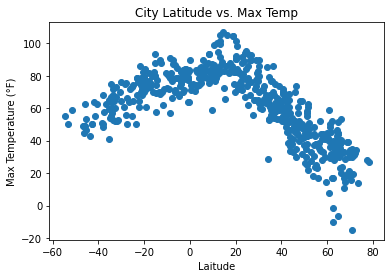

In [7]:


# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather["Lat"], weather["Max Temp"])
plt.title("City Latitude vs. Max Temp")
plt.xlabel("Laitude")

plt.ylabel("Max Temperature (°F)")

# Save Scatter Plot as .pngs
plt.savefig("Graphs/City Latitude vs Max Temperature.png")



## Latitude vs. Humidity Plot

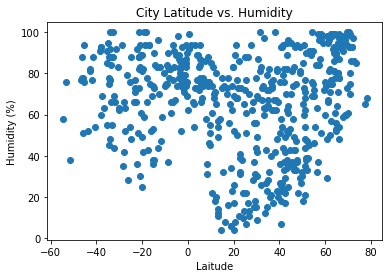

In [8]:


# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather["Lat"], weather["Humidity"])

plt.title("City Latitude vs. Humidity")
plt.xlabel("Laitude")
plt.ylabel("Humidity (%)")

plt.savefig("Graphs/City Latitude vs Humidity.png")



## Latitude vs. Cloudiness Plot

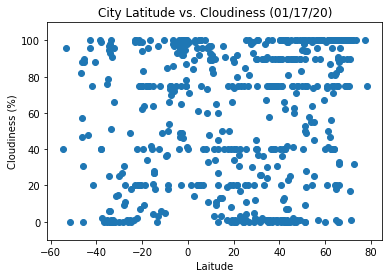

In [9]:


# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather["Lat"], weather["Cloudiness"])

plt.title("City Latitude vs. Cloudiness (01/17/20)")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness (%)")

# Set y axis limit to show limits at 0% and 100%
plt.ylim(-10,110)
plt.savefig("Graphs/City Latitude vs Cloudiness.png")



## Latitude vs. Wind Speed Plot

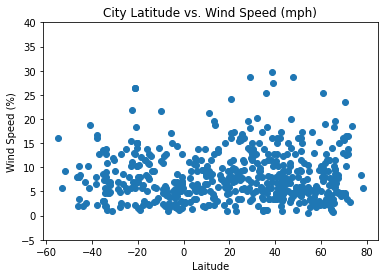

In [10]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather["Lat"], weather["Wind Speed"])
plt.title("City Latitude vs. Wind Speed (mph)")

plt.xlabel("Laitude")
plt.ylabel("Wind Speed (%)")


plt.ylim(-5,40)

plt.savefig("Graphs/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [11]:
import scipy.stats as stats

# split dataframe into northern and southern
northern_hemi = weather.loc[weather["Lat"] >= 0]
southern_hemi = weather.loc[weather["Lat"] < 0]

# Define function for x is x-axis and y-axis pulled from weather dataframe
def linear_regress(x,y):
    print(f"The r-value is : {round(stats.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress,"r-")
    return line_eq

# Define a fuction writing equation a and b are location of ploted equation
#starting from y
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : -0.86


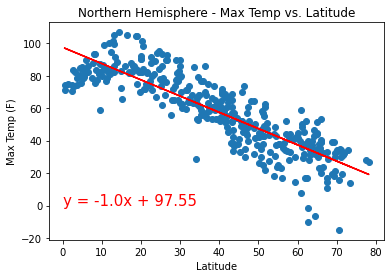

In [12]:
# Call an function #1
equation = linear_regress(northern_hemi["Lat"], northern_hemi["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("Graphs/Northern Hemisphere - Max Temp vs. Latitude.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : 0.73


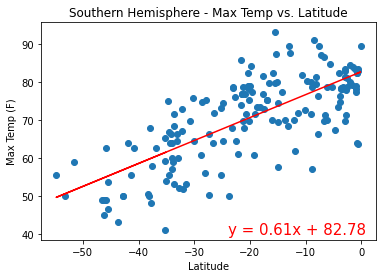

In [13]:


# Call an function #1
equation = linear_regress(southern_hemi["Lat"],southern_hemi["Max Temp"])

# Call an function #2
annotate(equation, -24, 40)

plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("Graphs/Southern Hemisphere - Max Temp vs. Latitude.png")



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : 0.27


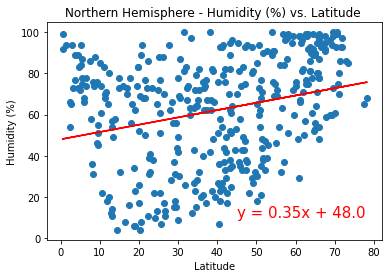

In [14]:
equation = linear_regress(northern_hemi["Lat"], northern_hemi["Humidity"])
annotate(equation, 45, 10)


plt.title("Northern Hemisphere - Humidity (%) vs. Latitude ")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Graphs/Northern Hemisphere - Humidity (%) vs. Latitude.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : 0.11


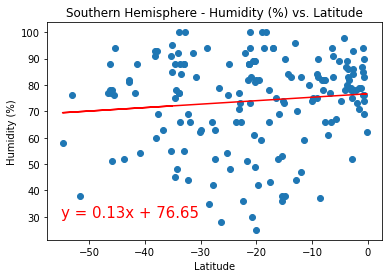

In [15]:

equation = linear_regress(southern_hemi["Lat"], southern_hemi["Humidity"])

annotate(equation, -55, 30)

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Graphs/Southern Hemisphere - Humidity (%) vs. Latitude.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : 0.24


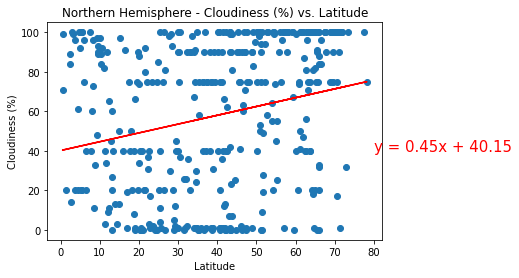

In [16]:

equation = linear_regress(northern_hemi["Lat"], northern_hemi["Cloudiness"])
annotate(equation, 80, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Graphs/Northern Hemisphere - Cloudiness (%) vs. Latitude.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : 0.27


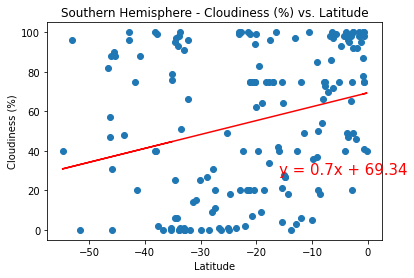

In [17]:
equation = linear_regress(southern_hemi["Lat"], southern_hemi["Cloudiness"])
annotate(equation, -16, 28)
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("Graphs/Southern Hemisphere - Cloudiness (%) vs. Latitude.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : -0.02


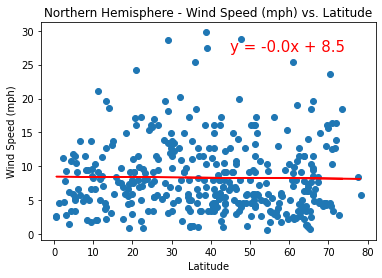

In [18]:
equation = linear_regress(northern_hemi["Lat"], northern_hemi["Wind Speed"])
annotate(equation, 45, 27)


plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("Graphs/Northern Hemisphere - Wind Speed vs. Latitude.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : -0.13


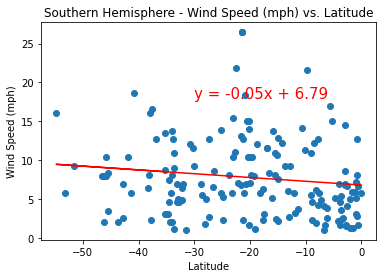

In [19]:
equation = linear_regress(southern_hemi["Lat"], southern_hemi["Wind Speed"])
annotate(equation, -30, 18)

plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")


plt.savefig("Graphs/Southern Hemisphere - Wind Speed vs. Latitude.png")